# 4.2 경사 하강법

## 4.2.0 설정

In [29]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "./drive/MyDrive/Colab Notebooks"
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 4.2.1 경사 하강법 (GD, Gradient Descent)

- 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘
- 기본 아이디어 : 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정

<br>

### 4.2.1.1 경사 하강법의 원리

- 파라미터 벡터 $\theta$에 대해 비용 함수의 현재 그래디언트(gradient)를 계산한다.
- 그리고 그래디언트가 감소하는 방향으로 진행한다.
- 그래디언트가 0이 되면 최솟값에 도달한 것이다.


<br>

### 4.2.1.2 경사 하강법 수행 과정

- $\theta$를 임의의 값으로 시작한다. (= **무작위 초기화(random initialization)**)
- 한 번에 조금씩 비용 함수(ex. MSE)가 감소하는 방향으로 진행한다.
- 알고리즘이 최솟값에 수렴할 때까지 점진적으로 향상시킨다.

<img src="../img/Ch04/Ch04-02_001.png" />

- 학습 스텝 크기는 비용 함수의 기울기에 비례한다.
- 따라서 파라미터가 최솟값에 가까워질수록 스텝 크기가 점진적으로 줄어든다.

<br>

### 4.2.1.3 학습률

- 경사 하강법에서 중요한 파라미터는 **스텝의 크기**이다.
- 스텝의 크기는 **학습률(learning rate)** 하이퍼파라미터로 결정된다.

- 학습률이 너무 작으면 알고리즘이 수렴하기 위해 반복을 많이 진행해야 하므로 시간이 오래 걸린다.

<img src="../img/Ch04/Ch04-02_002.png" />

- 학습률이 너무 크면 골짜기를 가로질러 반대편으로 건너뛰게 되어 이전보다 더 높은 곳으로 올라가게 된다.
- 이는 알고리즘을 더 큰 값으로 **발산**하게 만들어 적절한 해법을 찾지 못하게 한다.

<img src="../img/Ch04/Ch04-02_003.png" />

<br>

### 4.2.1.4 경사 하강법의 문제점

- 모든 비용 함수가 매끈한 그릇과 같지는 않다.
- 아래의 그림은 경사 하강법의 두 가지 문제점을 보여준다.

<img src="../img/Ch04/Ch04-02_004.png" />

- 알고리즘이 왼쪽에서 시작하면 **전역 최솟값(global minimum)** 보다 덜 좋은 **지역 최솟값(local minimum)**에 수렴한다.
- 알고리즘이 오른쪽에서 시작하면 평탄한 지역을 지나기 위해 시간이 오래 걸리고 일찍 멈추게 되어 전역 최솟값에 도달하지 못한다.

<br>

### 4.2.1.5 경사 하강법을 위한 비용 함수의 특징

- 선형 회귀를 위한 MSE 비용 함수는 곡선에서 어떤 두 점을 선택해 선을 그어도 곡선을 가로지르지 않는 **볼록 함수(convex function)**이다.
  - 이는 지역 최솟값이 없고 하나의 전역 최솟값만 있다는 것을 의미한다.
- 또한 연속된 함수이고 기울기가 갑자기 변하지 않는다.

- 이 두 사실로부터 경사 하강법이 (학습률이 너무 높지 않고 충분한 시간이 주어진다면) 전역 최솟값에 가깝게 접근할 수 있다는 것을 보장한다.

<br>

### 4.2.1.6 특성 스케일링 여부에 따른 경사 하강법

- 비용 함수는 특성들의 스케일이 매우 다르면 길쭉한 모양일 수 있다.

<img src="../img/Ch04/Ch04-02_005.png" />

- 왼쪽 그림
  - 특성 1과 특성 2의 스케일이 같은 훈련 세트의 경사 하강법
- 오른쪽 그림
  - 특성 1이 특성 2보다 더 작은 훈련 세트의 경사 하강법
  - 특성 1이 더 작기 때문에 비용 함수에 영향을 주기 위해서는 $\theta_1$이 더 크게 바뀌어야 한다.
  - 그래서 $\theta_1$ 축을 따라서 길쭉한 모양이 된다.

- 왼쪽 그림의 경사 하강법 알고리즘
  - 경사 하강법 알고리즘이 최솟값으로 곧장 진행하고 있어 빠르게 도달한다.
- 오른쪽 그림의 경사 하강법 알고리즘
  - 처음엔 전역 최솟값의 방향에 거의 직각으로 향한다.
  - 그러다가 평편한 골짜기를 길게 돌아서 나간다.
  - 결국 최솟값에 도달하겠지만 시간이 오래 걸릴 것이다.

- 경사 하강법을 사용할 때는 반드시 모든 특성이 같은 스케일을 갖도록 만들어야 한다.
  - ex) 사이킷런의 `StandardScaler` 사용
    - `StandardScaler`는 데이터의 각 특성에서 평균을 빼고 표준편차로 나누어 평균을 0으로, 분산은 1로 만든다.
- 그렇지 않으면 수렴하는 데 훨씬 오래 걸린다.

<br>

### 4.2.1.7 모델의 파라미터 공간

- 앞의 그림은 모델 훈련이 (훈련 세트에서) 비용 함수를 최소화하는 모델 파라미터의 조합을 찾는 일임을 설명해준다.
- 이를 모델의 **파라미터 공간(parameter space)**에서 찾는다고 말한다.
- 모델이 가진 파라미터가 많을수록 이 공간의 차원은 커지고 검색이 더 어려워진다.

<br>

## 4.2.2 배치 경사 하강법 (BGD, Batch Gradient Descent)

### 4.2.2.1 편도 함수

- 경사 하강법을 구현하려면 각 모델 파라미터 $\theta_j$에 대해 비용 함수의 그래디언트를 계산해야 한다.
- 다시 말해 $\theta_j$가 조금 변경될 때 비용 함수가 얼마나 바뀌는 지 계산해야 한다.
- 이를 **편도 함수(partial derivative)**라고 한다.
- 모든 차원에 대해서 특정 방향으로 바라봤을 때의 기울기를 확인한다.

- 파라미터 $\theta_j$에 대한 비용 함수의 편도 함수 식은 다음과 같다.

<br>

$
\qquad
\dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
 = \dfrac{2}{m} \sum_{i=1}^m \left( \theta^T \mathbf{x}^{(i)} \mathbf{y}^{(i)} \right) x_{j}^{(i)}
$

<br>

### 4.2.2.2 비용 함수의 그래디언트 벡터

- 편도 함수를 각각 계산하는 대신 아래의 식을 사용하여 한꺼번에 계산할 수 있다.
- 그래디언트 벡터 $\triangledown_\theta \text{MSE}(\boldsymbol{\theta})$ 는 비용 함수의 (모델 파라미터마다 한 개씩인) 편도 함수를 모두 담고 있다.

<br>

$
\qquad
\triangledown_\theta \text{MSE}(\boldsymbol{\theta}) = 
\left\lgroup
\matrix{
    \dfrac{\partial}{\partial \boldsymbol{\theta}_0} \text{MSE}(\boldsymbol{\theta}) \cr
    \dfrac{\partial}{\partial \boldsymbol{\theta}_1} \text{MSE}(\boldsymbol{\theta}) \cr
    \vdots \cr
    \dfrac{\partial}{\partial \boldsymbol{\theta}_n} \text{MSE}(\boldsymbol{\theta}) \cr
}
\right\rgroup
= \dfrac{2}{m} \mathbf{X}^T (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})
$

<br>

- $\mathbf{X}$ 는 샘플 수($m$), 특성 수($n$)인 $m \times n$ 행렬이다.
- 이것을 $n$개의 파라미터를 가진 $n \times 1$ 벡터 $\theta$와 곱해서 $m \times 1$ 벡터를 만든다.
- 같은 크기의 $\mathbf{y}$ 벡터를 빼고 $\mathbf{X}$ 자기 자신과의 곱셈을 위해 $\mathbf{X}$ 행렬을 전치시켜 $n \times m$ 행렬로 바꿔 곱한다.
- 최종 계산 결과는 파라미터 수와 같은 $n \times 1$ 벡터가 된다.

<br>

### 4.2.2.3 배치 경사 하강법

- 위 공식은 매 경사 하강법 스텝에서 전체 훈련 세트 $\mathbf{X}$에 대해 계산한다.
- 그래서 이 알고리즘을 **배치 경사 하강법(batch gradient descent)** 라고 한다.
- 즉, 매 스텝에서 훈련 데이터 전체를 사용한다.
- 이런 이유로 매우 큰 훈련 세트에서는 아주 느리다.
- 그러나 경사 하강법은 특성 수에 민감하지 않다.
- 수십만 개의 특성에서 선형 회귀를 훈련시키려면 정규방정식이나 SVD 분해보다 경사 하강법을 사용하는 편이 훨씬 빠르다.

<br>

### 4.2.2.4 경사 하강법의 스텝

- 위로 향하는 그래디언트 벡터가 구해지면 반대 방향인 아래로 가야 한다.
  - $\theta$ 에서 $\triangledown_\theta \text{MSE}(\boldsymbol{\theta})$ 를 빼야 한다는 뜻이다.
- 여기서 학습률 $\eta$ 가 사용된다.
- 내려가는 스텝의 크기를 결정하기 위해 그래디언트 벡터에 $\eta$를 곱한다.

<br>

$
\qquad
\theta^{\text{(next step)}} = \theta - \eta \triangledown_\theta \text{MSE}(\boldsymbol{\theta})
$

<br>

<br>

### 4.2.2.5 배치 경사 하강법 구현

$
\qquad
\triangledown_\theta \text{MSE}(\boldsymbol{\theta})
= \dfrac{2}{m} \mathbf{X}^T (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})
$

In [30]:
X = 2 * np.random.rand(100, 1)
X_b = np.c_[np.ones((100, 1)), X]
y = 4 + 3 * X + np.random.randn(100, 1)

eta = 0.1 # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [31]:
theta

array([[4.21509616],
       [2.77011339]])

- 정규방정식으로 찾은 것과 같은 것을 확인할 수 있다.

In [32]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.21509616],
       [2.77011339]])

<br>

### 4.2.2.6 학습률 변화에 따른 경사 하강법

- 아래의 그림은 3가지 다른 학습률을 사용하여 진행한 경사 하강법의 스템 처음 10개를 보여준다.
  - 점선 : 시작점

In [33]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, 'b.')
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if iteration > 0 else 'r--'
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)            

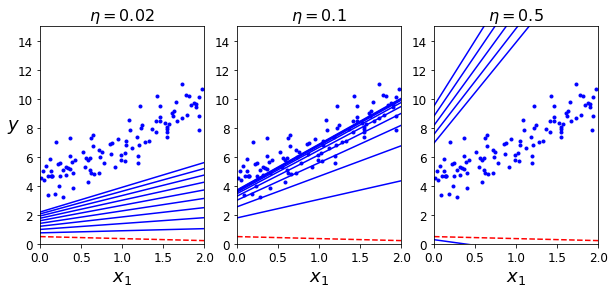

In [34]:
np.random.seed(42)

theta_path_bgd = []

theta = np.random.randn(2,1) # random initialization

plt.figure(figsize=(10,4))

plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

**왼쪽 그림 : $\eta = 0.02$**

- 학습률이 너무 낮다.
- 알고리즘은 최적점에 도달하겠지만 시간이 오래 걸릴 것이다.

**중간 그림 : $\eta = 0.1$**

- 학습률이 적당해 보인다.
- 반복 몇 번 만에 이미 최적점에 수렴했다.

**오른쪽 그림 : $\eta = 0.5$**

- 학습률이 너무 높다.
- 알고리즘이 이리저리 널뛰면서 스텝마다 최적점에서 점점 더 멀어져 발산한다.

<br>

### 4.2.2.7 적절한 학습률 찾는 방법

- 적절한 학습률을 찾으려면 그리드 탐색을 사용한다.
- 하지만 그리드 탐색에서 수렴하는 데 너무 오래 걸리는 모델을 막기 위해 반복 횟수를 제한해야 한다.

<br>

### 4.2.2.8 반복 횟수 지정 방법

- 반복 횟수가 너무 작은 경우
  - 최적점에 도달하기 전에 알고리즘이 멈춘다.
- 반복 횟수가 너무 큰 경우
  - 모델 파라미터가 더는 변하지 않는 동안 시간을 낭비하게 된다.
- 해결책
  - 반복 횟수를 아주 크게 지정하고 그래디언트 벡터가 아주 작아지면 즉, 벡터의 노름이 어떤 값 $\varepsilon$ (허용오차, tolerance)보다 작아지면 경사 하강법이 (거의) 최솟값에 도달한 것이므로 알고리즘을 중지한다.

<br>

### 4.2.2.9 수렴율

- 비용 함수가 블록 함수이고 기울기가 급격하게 바뀌지 않는 경우(ex. MSE 비용 함수), 학습률을 고정한 배치 경사 하강법은 어느 정도 시간이 걸리겠지만 결국 최적의 솔루션에 수렴할 것이다.
- 비용 함수의 모양에 따라 달라지겠지만 $\varepsilon$ 범위 안에서 최적의 솔루션에 도달하기 위해서는 $O(1/\varepsilon)$ 의 **반복**이 걸릴 수 있다.
- 다시 말해 (더 정확한 최솟값을 얻기 위해) 허용 오차 $\varepsilon$ 을 $1/10$ 로 줄이면 알고리즘의 반복은 10배 늘어난다.

<br>

## 4.2.3 확률적 경사 하강법 (SGD, Stochastic Gradient Descent)

### 4.2.3.1 배치 경사 하강법의 문제점

- 배치 경사 하강법은 매 스텝에서 전체 훈련 세트를 사용해 그래디언트를 계산한다.
- 그러므로 훈련 세트가 커지면 매우 느려지게 된다.

<br>

### 4.2.3.2 확률적 경사 하강법의 장점

- 확률적 경사 하강법은 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레디언트를 계산한다.
- 매 반복에서 다뤄야 할 데이터가 매우 적기 때문에 한 번에 하나의 샘플을 처리하면 알고리즘이 훨씬 빠르다.
- 또한 반복에서 하나의 샘플만 메모리에 있으면 되므로 매우 큰 훈련세트도 훈련시킬 수 있다.
  - SGD는 외부 메모리 학습 알고리즘으로 구현할 수 있다.

<img src="../img/Ch04/Ch04-02_004.png" />

- 위의 그림처럼 비용 함수가 매우 불규칙할 경우 알고리즘이 지역 최솟값을 건너뛸 수 있도록 도와주므로 확률적 경사 하강법이 배치 경사 하강법보다 전역 최솟값을 찾을 가능성이 높다.

<br>

### 4.2.3.3 확률적 경사 하강법의 단점

- 확률적(즉, 무작위)이기 때문에 이 알고리즘은 배치 경사 하강법보다 훨씬 불안정하다.
- 비용 함수가 최솟값에 다다를 때까지 부드럽게 감소하지 않고 위아래로 요동치면서 평균적으로 감소한다.
- 시간이 지나면 최솟값에 매우 근접하겠지만 요동이 지속되면서 최솟값에 안착하지 못할 것 이다.

<img src="../img/Ch04/Ch04-02_006.png" />

- 무작위성은 지역 최솟값에서 탈출시켜줘서 좋지만 알고리즘을 전역 최솟값에 다다르지 못하게 한다는 점에서는 좋지 않다.

<br>

### 4.2.3.4 학습 스케쥴 (learning schedule)

- 위와 같은 딜레마를 해결하는 방법은 **학습률을 점진적으로 감소시키는 것**이다.
  - 시작할 때는 학습률을 크게 한다.  
  (수렴을 빠르게 하고 지역 최솟값에 빠지지 않게 한다.)
  - 점차 학습률을 작게 줄여서 알고리즘이 전역 최솟값에 도달하게 한다.
- 이 과정은 금속공학 분야의 **담금질 기법(simulated annealing)** 알고리즘과 유사하다.
- 매 반복에서 학습률을 결정하는 함수를 **학습 스케쥴(learning schedule)** 이라고 부른다.


- 학습률이 너무 빨리 줄어들 경우
  - 지역 최솟값에 갇히거나 최솟값까지 가는 중간에 멈출 수 있다.
- 학습률이 너무 천천히 줄어들 경우
  - 오랫동안 최솟값 주변을 맴돌거나 훈련을 너무 일찍 중지해서 지역 최솟값에 머무를 수 있다.

<br>

### 4.2.3.5 학습 스케쥴을 사용한 확률적 경사 하강법 구현 및 시각화

- **에포크(epoch)**
  - 한 반복에서 훈련 세트에 있는 샘플 수(`m`) 만큼 되풀이 되고, 이때의 각 반복을 에포크라고 한다.

그림 저장: sgd_plot


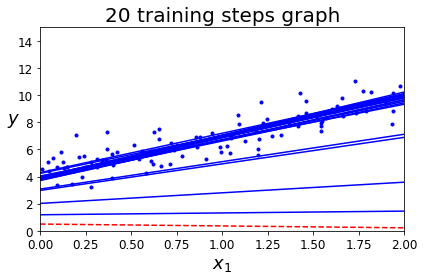

In [35]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50 # 학습 스케쥴 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m): # 한 epoch 에서 훈련 세트에 있는 샘플 수(m)번 반복
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)         

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title('20 training steps graph', fontsize=20)
plt.axis([0, 2, 0, 15])

save_fig("sgd_plot")

plt.show()

In [36]:
theta

array([[4.21076011],
       [2.74856079]])

- 샘플을 무작위로 선택하기 때문에 어떤 샘플은 한 에포크에서 여러 번 선택될 수도 있고 어떤 샘플은 전혀 선택되지 못할 수도 있다.
- 알고리즘이 에포크마다 모든 샘플을 사용하게 하려면
훈련세트를 섞은 후(입력 특성과 레이블을 동일하게 섞어야 함)차례대로 하나씩 선택하고 그 다음 에포크에서 다시 섞는 식의 방법을 사용할 수 있다.
  - 그러나 이렇게 하면 보통 늦게 수렴 된다.

<br>

### 4.2.3.6 사이킷런의 `SGDRegressor`

- 사이킷런에서 SGD 방식으로 선형 회귀를 사용하려면 기본값으로 제곱 오차 비용 함수를 최적화하는 `SGDRegressor` 클래스를 사용한다.

- `max_iter=1000`
  - 다음 코드는 최대 1,000번 에포크 동안 실행된다.
- `tol=1e-3`
  - 한 에포크에서 `0.001`보다 적게 손실이 줄어들 때까지 실행된다.
- `eta0=0.1`
  - 학습률 `0.1`로 기본 학습 스케쥴을 사용한다.
- `penalty=None`
  - 규제는 사용하지 않는다.
- `learning_rate='invscaling'`
  - `learning_rate` 은 학습 스케쥴을 의미하는 매개변수이다.
  - 해당 매개변수의 기본값인 `invscaling` 는 반복 횟수 `t`와 `eta0.power_t` 두 매개변수를 사용한 공식으로 학습률을 계산한다.
    - `t` 기본값 = 0.01
    - `eta0.power_t` 기본값 = 0.25


In [37]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [38]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.23868557]), array([2.82181634]))

- 여기서도 정규방정식으로 구한 것과 매우 비슷한 값을 얻었다.

<br>

## 4.2.4 미니배치 경사 하강법 (MGD, mini-batch gradient descent)

### 4.2.4.1 미니배치 활용 그래디언트 계산

- **미니배치**라 부르는 임의의 작은 샘플 세트에 대해 그래디언트를 계산한다.
- SGD 대비 장점
  - 행렬 연산에 최적화된 하드웨어, 특히 GPU를 사용해서 얻는 성능 향상
  - 미니배치를 어느 정도 크게 하면 이 알고리즘은 파라미터 공간에서 SGD보다 덜 불규칙하게 움직인다.
  - 결국 미니배치 경사 하강법이 SGD보다 최솟값에 더 가까이 도달하게 될 것이다.

<br>

### 4.2.4.2 세 가지 경사 하강법 알고리즘 비교

- 다음 그림은 세 가지 경사 하강법 알고리즘이 훈련 과정 동안 파라미터 공간에서 움직인 경로를 나타낸다.

In [39]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # 랜덤 초기화

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [40]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [41]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

그림 저장: gradient_descent_paths_plot


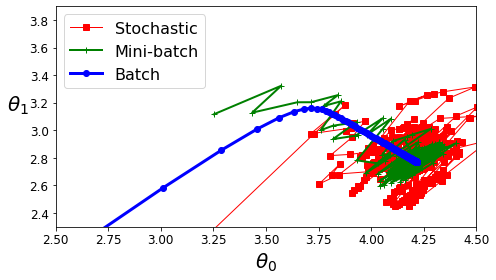

In [46]:
plt.figure(figsize=(7,4))

plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")

plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])

save_fig("gradient_descent_paths_plot")

plt.show()

- 최솟값 도달 관련
  - 모두 최솟값 근처에 도달
  - BGD : 실제 최솟값에서 멈춤
  - SGD : 실제 최솟값 근처에서 맴돌고 있음
  - MGD : 실제 최솟값 근처에서 맴돌고 있음
- 소요 시간 관련
  - BGD : 매 스텝에서 많은 시간이 소요됨
  - SGD : 적절한 학습 스케쥴을 사용하면 최솟값 도달
  - MGD : 적절한 학습 스케쥴을 사용하면 최솟값 도달

<br>

## 4.2.5 선형 회귀를 사용한 알고리즘 비교

- $m$ : 훈련 샘플 수
- $n$ : 특성 수  
  

- 정규방정식 : 선형 회귀만을 위한 알고리즘
- 경사 하강법 알고리즘 : 선형 회귀 이외의 여러 가지 다른 모델도 훈련시킬 수 있다.

<img src="../img/Ch04/Ch04-02_007.png" />

- 사이킷런의 `SGDRegressor`와 `SGDClassifier`에서 `partial_fit` 메서드를 사용하여 모델 파라미터를 초기화하지 않고 미니배치 학습을 위해 반복적으로 호출할 수 있다.
- 하지만 `partial_fit` 메서드는 `fit` 메서드와 동일하게 미니배치의 샘플을 하나씩 적용하므로 엄밀히 말하면 미니배치 경사 하강법 알고리즘은 아니다.  
  

- 위 표의 알고리즘들은 훈련 결과에 거의 차이가 없다.
- 모두 매우 비슷한 모델을 만들고 정확히 같은 방식으로 예측한다.